In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb


In [2]:
data = pd.read_csv('../datasets/mushrooms.csv')
print("Data shape:", data.shape)
data.head()

Data shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mappings = {
    "class":{
        "p":"poisonous",
        "e":"edible",
    },
    "cap-shape": {
        "b": "bell", "c": "conical", "x": "convex",
        "f": "flat", "k": "knobbed", "s": "sunken"
    },
    "cap-surface": {
        "f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"
    },
    "cap-color": {
        "n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green",
        "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"
    },
    "bruises": {"t": "bruises", "f": "no"},
    "odor": {
        "a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul",
        "m": "musty", "n": "none", "p": "pungent", "s": "spicy"
    },
    "gill-attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
    "gill-spacing": {"c": "close", "w": "crowded", "d": "distant"},
    "gill-size": {"b": "broad", "n": "narrow"},
    "gill-color": {
        "k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray",
        "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red",
        "w": "white", "y": "yellow"
    },
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {
        "b": "bulbous", "c": "club", "u": "cup", "e": "equal",
        "z": "rhizomorphs", "r": "rooted", "?": "missing"
    },
    "stalk-surface-above-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-surface-below-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-color-above-ring": {
        "n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange",
        "p": "pink", "e": "red", "w": "white", "y": "yellow"
    },
    "stalk-color-below-ring": {
        "n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange",
        "p": "pink", "e": "red", "w": "white", "y": "yellow"
    },
    "veil-type": {"p": "partial", "u": "universal"},
    "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
    "ring-number": {"n": "none", "o": "one", "t": "two"},
    "ring-type": {
        "c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large",
        "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"
    },
    "spore-print-color": {
        "k": "black", "n": "brown", "b": "buff", "h": "chocolate",
        "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"
    },
    "population": {
        "a": "abundant", "c": "clustered", "n": "numerous",
        "s": "scattered", "v": "several", "y": "solitary"
    },
    "habitat": {
        "g": "grasses", "l": "leaves", "m": "meadows", "p": "paths",
        "u": "urban", "w": "waste", "d": "woods"
    }
}

In [4]:
data = data.replace(mappings)
print("Data after mapping:")
data.head()

Data after mapping:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [5]:
print("Column names:", data.columns.tolist())
print("Null values per column:", data.isnull().sum())

Column names: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Null values per column: class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type             

In [6]:
X = data.drop(columns=["class"])
y = data[["class"]]

In [7]:
print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)

Feature matrix shape: (8124, 22)
Target shape: (8124, 1)


In [8]:
print("Encoding categorical features...")
X_encoded = X.apply(LabelEncoder().fit_transform)

Encoding categorical features...


In [9]:
label_encoder_y = LabelEncoder()
y_encoded = label_encoder_y.fit_transform(y.values.ravel())

print("Encoded feature matrix shape:", X_encoded.shape)
print("Encoded target shape:", y_encoded.shape)
print("Target classes:", label_encoder_y.classes_)

Encoded feature matrix shape: (8124, 22)
Encoded target shape: (8124,)
Target classes: ['edible' 'poisonous']


In [11]:
X_encoded.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,3,0,0,7,1,0,1,0,0,...,3,7,7,0,2,1,4,0,3,4
1,2,3,9,0,0,1,0,0,0,0,...,3,7,7,0,2,1,4,1,2,0
2,0,3,8,0,1,1,0,0,1,0,...,3,7,7,0,2,1,4,1,2,2
3,2,2,8,0,7,1,0,1,1,0,...,3,7,7,0,2,1,4,0,3,4
4,2,3,3,1,6,1,1,0,0,1,...,3,7,7,0,2,1,0,1,0,0


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [13]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (6499, 22)
Test set shape: (1625, 22)


In [25]:
print("Training XGBoost model...")
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification                 # Maximum tree depth
    learning_rate=0.1,            # Learning rate
    n_estimators=10000,             # Number of boosting rounds
    subsample=0.8,                # Subsample ratio of training instances
    colsample_bytree=0.8,         # Subsample ratio of features
    random_state=42,              # For reproducibility
    eval_metric='logloss',
    early_stopping_rounds = 50,        # Evaluation metric
    verbosity=1                   # Control verbosity
)

Training XGBoost model...


In [27]:
xgb_model.fit(X_train, y_train,
eval_set = [(X_train, y_train), (X_test, y_test)],
verbose=True
)
print("✅ XGBoost model training completed!")

[0]	validation_0-logloss:0.60163	validation_1-logloss:0.60175
[1]	validation_0-logloss:0.52395	validation_1-logloss:0.52413
[2]	validation_0-logloss:0.45996	validation_1-logloss:0.46018
[3]	validation_0-logloss:0.40518	validation_1-logloss:0.40567
[4]	validation_0-logloss:0.35831	validation_1-logloss:0.35900
[5]	validation_0-logloss:0.31808	validation_1-logloss:0.31861
[6]	validation_0-logloss:0.28288	validation_1-logloss:0.28339
[7]	validation_0-logloss:0.25249	validation_1-logloss:0.25306


[8]	validation_0-logloss:0.22753	validation_1-logloss:0.22842
[9]	validation_0-logloss:0.20357	validation_1-logloss:0.20440
[10]	validation_0-logloss:0.18301	validation_1-logloss:0.18369
[11]	validation_0-logloss:0.16423	validation_1-logloss:0.16496
[12]	validation_0-logloss:0.14839	validation_1-logloss:0.14903
[13]	validation_0-logloss:0.13368	validation_1-logloss:0.13434
[14]	validation_0-logloss:0.12033	validation_1-logloss:0.12095
[15]	validation_0-logloss:0.10883	validation_1-logloss:0.10934
[16]	validation_0-logloss:0.09878	validation_1-logloss:0.09917
[17]	validation_0-logloss:0.08964	validation_1-logloss:0.08999
[18]	validation_0-logloss:0.08095	validation_1-logloss:0.08129
[19]	validation_0-logloss:0.07314	validation_1-logloss:0.07348
[20]	validation_0-logloss:0.06619	validation_1-logloss:0.06655
[21]	validation_0-logloss:0.06006	validation_1-logloss:0.06041
[22]	validation_0-logloss:0.05456	validation_1-logloss:0.05495
[23]	validation_0-logloss:0.04942	validation_1-logloss:0.

In [28]:
print("Making predictions...")
y_pred = xgb_model.predict(X_test)

Making predictions...


In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder_y.classes_))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [30]:
print("Generating feature importance plot...")
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

Generating feature importance plot...


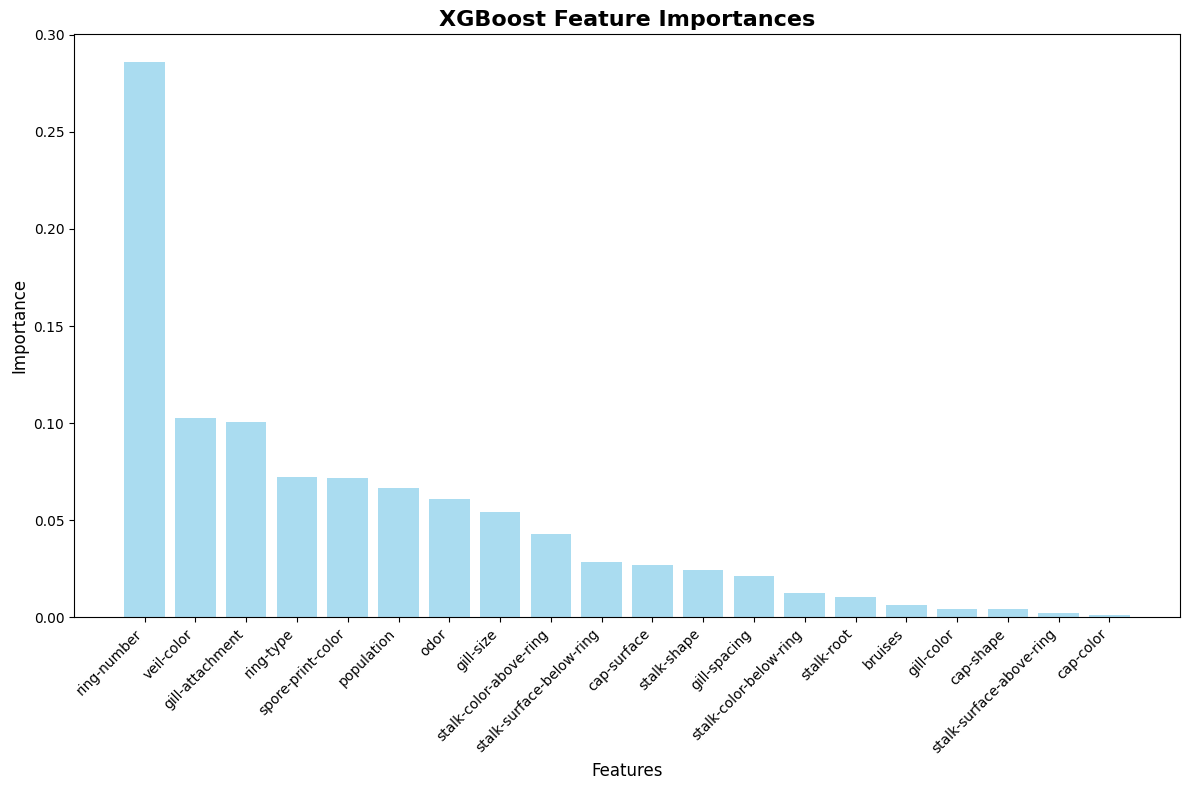

In [31]:
k = min(20, len(importances))

plt.figure(figsize=(12, 8))
plt.title("XGBoost Feature Importances", fontsize=16, fontweight='bold')
plt.bar(range(k), importances[indices[:k]], align="center", alpha=0.7, color='skyblue')
plt.xticks(range(k), X.columns[indices[:k]], rotation=45, ha='right')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
print("\nTop 10 Most Important Features:")
for i in range(min(10, len(importances))):
    feature_idx = indices[i]
    print(f"{i+1:2d}. {X.columns[feature_idx]:<25} {importances[feature_idx]:.4f}")



Top 10 Most Important Features:
 1. ring-number               0.2860
 2. veil-color                0.1028
 3. gill-attachment           0.1006
 4. ring-type                 0.0720
 5. spore-print-color         0.0714
 6. population                0.0667
 7. odor                      0.0608
 8. gill-size                 0.0540
 9. stalk-color-above-ring    0.0431
10. stalk-surface-below-ring  0.0286


In [33]:
print("\nSample Predictions:")
sample = X_test.head()
sample_predictions = xgb_model.predict(sample)
sample_probabilities = xgb_model.predict_proba(sample)

print("Predictions:", [label_encoder_y.inverse_transform([pred])[0] for pred in sample_predictions])
print("Actual:", [label_encoder_y.inverse_transform([actual])[0] for actual in y_test[:5]])
print("\nPrediction Probabilities:")
for i, (pred, prob) in enumerate(zip(sample_predictions, sample_probabilities)):
    class_name = label_encoder_y.inverse_transform([pred])[0]
    confidence = prob[pred]
    print(f"Sample {i+1}: {class_name} (confidence: {confidence:.3f})")



Sample Predictions:
Predictions: ['poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous']
Actual: ['poisonous', 'poisonous', 'edible', 'poisonous', 'poisonous']

Prediction Probabilities:
Sample 1: poisonous (confidence: 1.000)
Sample 2: poisonous (confidence: 1.000)
Sample 3: edible (confidence: 1.000)
Sample 4: poisonous (confidence: 1.000)
Sample 5: poisonous (confidence: 1.000)


In [34]:
model_package = {
    'model': xgb_model,
    'label_encoder': label_encoder_y,
    'feature_columns': X.columns.tolist(),
    'model_type': 'XGBoost',
    'accuracy': accuracy
}

model_filename = "xgboost_mushrooms_complete.pkl"
joblib.dump(model_package, model_filename)
print(f"✅ Complete model package saved as {model_filename}")
print("Package contains: model, label_encoder, feature_columns, model_type, accuracy")

✅ Complete model package saved as xgboost_mushrooms_complete.pkl
Package contains: model, label_encoder, feature_columns, model_type, accuracy


In [35]:
print("\n" + "="*50)
print("XGBoost Model Training Summary")
print("="*50)
print(f"Final Accuracy: {accuracy:.4f}")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Model package saved: {model_filename}")
print("Contains: model + label_encoder + feature_columns + metadata")
print("="*50)


XGBoost Model Training Summary
Final Accuracy: 1.0000
Training samples: 6499
Test samples: 1625
Number of features: 22
Model package saved: xgboost_mushrooms_complete.pkl
Contains: model + label_encoder + feature_columns + metadata
